In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("youtube.csv")
df.head()

,index,video_id,trending_date,title,channel_title,category_id,publish_date,time_frame,published_day_of_week,publish_country,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,13/11/2017,17:00 to 17:59,Monday,US,SHANtell martin,748374,57527,2966,15954,False,False,False
1,1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,13/11/2017,7:00 to 7:59,Monday,US,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False
2,2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,12/11/2017,19:00 to 19:59,Sunday,US,"racist superman|""rudy""""|""""mancuso""""|""""king""""|""...",3191434,146033,5339,8181,False,False,False
3,3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,13/11/2017,11:00 to 11:59,Monday,US,"rhett and link|""gmm""""|""""good mythical morning""...",343168,10172,666,2146,False,False,False
4,4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,12/11/2017,18:00 to 18:59,Sunday,US,"ryan|""higa""""|""""higatv""""|""""nigahiga""""|""""i dare ...",2095731,132235,1989,17518,False,False,False


In [3]:
df.shape
df.columns
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161470 entries, 0 to 161469
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   index                   161470 non-null  int64 
 1   video_id                161470 non-null  object
 2   trending_date           161470 non-null  object
 3   title                   161470 non-null  object
 4   channel_title           161470 non-null  object
 5   category_id             161470 non-null  int64 
 6   publish_date            161470 non-null  object
 7   time_frame              161470 non-null  object
 8   published_day_of_week   161470 non-null  object
 9   publish_country         161470 non-null  object
 10  tags                    161470 non-null  object
 11  views                   161470 non-null  int64 
 12  likes                   161470 non-null  int64 
 13  dislikes                161470 non-null  int64 
 14  comment_count           161470 non-n

,index,category_id,views,likes,dislikes,comment_count
count,161470.00000,161470.000000,1.614700e+05,1.614700e+05,1.614700e+05,1.614700e+05
mean,80734.50000,19.461151,2.419854e+06,6.566194e+04,3.490153e+03,7.035494e+03
std,46612.51832,7.432001,1.043749e+07,2.260617e+05,3.114779e+04,3.404121e+04
min,0.00000,1.000000,2.230000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,40367.25000,15.000000,1.015382e+05,1.975000e+03,8.500000e+01,2.790000e+02
50%,80734.50000,23.000000,3.847395e+05,9.840000e+03,3.480000e+02,1.144000e+03
75%,121101.75000,24.000000,1.339528e+06,4.006275e+04,1.350000e+03,4.144750e+03
max,161469.00000,44.000000,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06


simple data cleaning

In [4]:
df = df.drop_duplicates()
df.isnull().sum()
df = df.dropna(subset=["views", "likes", "comment_count"])

formatting the text dates into real dates

In [5]:
df["publish_date"] = pd.to_datetime(df["publish_date"])
df["trending_date"] = pd.to_datetime(
    df["trending_date"],
    format="%y.%d.%m"
)


/var/folders/n2/y90sy3vj5tn0kz3292nyp3kr0000gn/T/ipykernel_4610/1414306154.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["publish_date"] = pd.to_datetime(df["publish_date"])


In [6]:
bool_cols = ["comments_disabled", "ratings_disabled", "video_error_or_removed"]

df[bool_cols] = df[bool_cols].astype(int)
df.head()


,index,video_id,trending_date,title,channel_title,category_id,publish_date,time_frame,published_day_of_week,publish_country,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,17:00 to 17:59,Monday,US,SHANtell martin,748374,57527,2966,15954,0,0,0
1,1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,7:00 to 7:59,Monday,US,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,0,0,0
2,2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,19:00 to 19:59,Sunday,US,"racist superman|""rudy""""|""""mancuso""""|""""king""""|""...",3191434,146033,5339,8181,0,0,0
3,3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,11:00 to 11:59,Monday,US,"rhett and link|""gmm""""|""""good mythical morning""...",343168,10172,666,2146,0,0,0
4,4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,18:00 to 18:59,Sunday,US,"ryan|""higa""""|""""higatv""""|""""nigahiga""""|""""i dare ...",2095731,132235,1989,17518,0,0,0


engagement features

In [7]:
df["like_ratio"] = df["likes"] / df["views"]
df["comment_ratio"] = df["comment_count"] / df["views"]
df["dislike_ratio"] = df["dislikes"] / df["views"]

more cleaning

In [8]:
df = df[df["views"] > 0]

df["days_to_trend"] = (df["trending_date"] - df["publish_date"]).dt.days
df = df[df["days_to_trend"] >= 0]
df.head()



,index,video_id,trending_date,title,channel_title,category_id,publish_date,time_frame,published_day_of_week,publish_country,...,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,like_ratio,comment_ratio,dislike_ratio,days_to_trend
0,0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,17:00 to 17:59,Monday,US,...,57527,2966,15954,0,0,0,0.076869,0.021318,0.003963,1
1,1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,7:00 to 7:59,Monday,US,...,97185,6146,12703,0,0,0,0.040179,0.005252,0.002541,1
2,2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,19:00 to 19:59,Sunday,US,...,146033,5339,8181,0,0,0,0.045758,0.002563,0.001673,2
3,3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,11:00 to 11:59,Monday,US,...,10172,666,2146,0,0,0,0.029641,0.006253,0.001941,1
4,4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,18:00 to 18:59,Sunday,US,...,132235,1989,17518,0,0,0,0.063097,0.008359,0.000949,2


In [9]:
# title analysis goes here
df["title_length"] = df["title"].str.len()
df["is_all_caps"] = df["title"].str.isupper()
df["tag_count"] = df["tags"].apply(lambda x: len(str(x).split("|")))


In [10]:
df.head()
df.describe()


,index,trending_date,category_id,publish_date,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,like_ratio,comment_ratio,dislike_ratio,days_to_trend,title_length,tag_count
count,161470.00000,161470,161470.000000,161470,1.614700e+05,1.614700e+05,1.614700e+05,1.614700e+05,161470.000000,161470.000000,161470.000000,161470.000000,161470.000000,161470.000000,161470.000000,161470.000000,161470.000000
mean,80734.50000,2018-02-26 05:14:01.374868224,19.461151,2018-02-11 12:09:47.522140160,2.419854e+06,6.566194e+04,3.490153e+03,7.035494e+03,0.017266,0.008819,0.000873,0.036436,0.005167,0.001587,14.711271,54.390568,18.007692
min,0.00000,2017-11-14 00:00:00,1.000000,2006-07-23 00:00:00,2.230000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,40367.25000,2018-01-03 00:00:00,15.000000,2017-12-29 00:00:00,1.015382e+05,1.975000e+03,8.500000e+01,2.790000e+02,0.000000,0.000000,0.000000,0.011685,0.001440,0.000529,1.000000,36.000000,8.000000
50%,80734.50000,2018-02-25 00:00:00,23.000000,2018-02-19 00:00:00,3.847395e+05,9.840000e+03,3.480000e+02,1.144000e+03,0.000000,0.000000,0.000000,0.027469,0.003048,0.000881,3.000000,50.000000,16.000000
75%,121101.75000,2018-04-23 00:00:00,24.000000,2018-04-16 00:00:00,1.339528e+06,4.006275e+04,1.350000e+03,4.144750e+03,0.000000,0.000000,0.000000,0.051120,0.006051,0.001561,7.000000,68.000000,27.000000
max,161469.00000,2018-06-14 00:00:00,44.000000,2018-06-14 00:00:00,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06,1.000000,1.000000,1.000000,0.494823,0.413683,0.253870,4215.000000,280.000000,124.000000
std,46612.51832,NaN,7.432001,NaN,1.043749e+07,2.260617e+05,3.114779e+04,3.404121e+04,0.130263,0.093495,0.029538,0.032947,0.007654,0.004148,145.192259,25.647133,12.449159


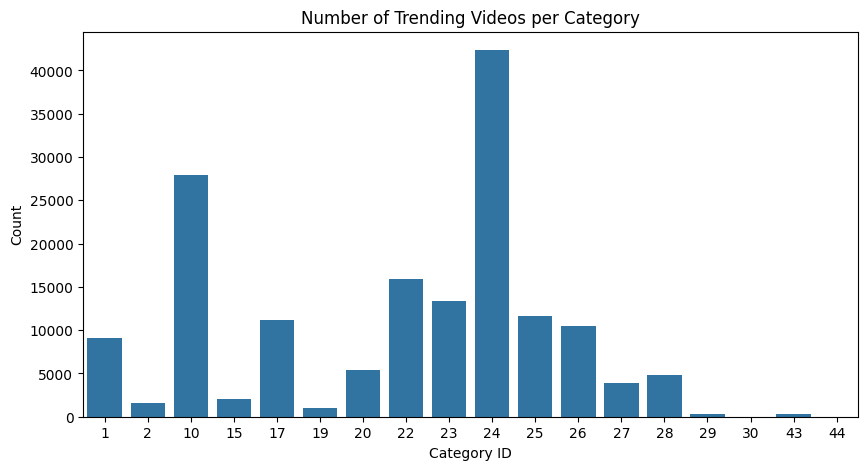

In [21]:
#trending categories
category_counts = df["category_id"].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title("Number of Trending Videos per Category")
plt.xlabel("Category ID")
plt.ylabel("Count")
plt.show()



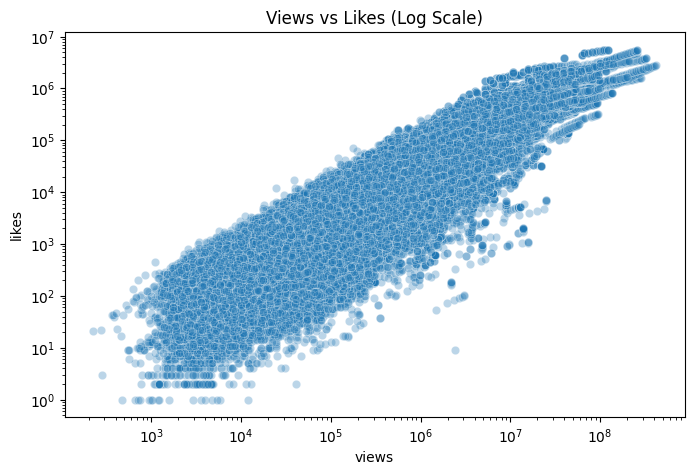

In [23]:
#views vs likes
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="views", y="likes", alpha=0.3)
plt.xscale("log")
plt.yscale("log")
plt.title("Views vs Likes (Log Scale)")
plt.show()


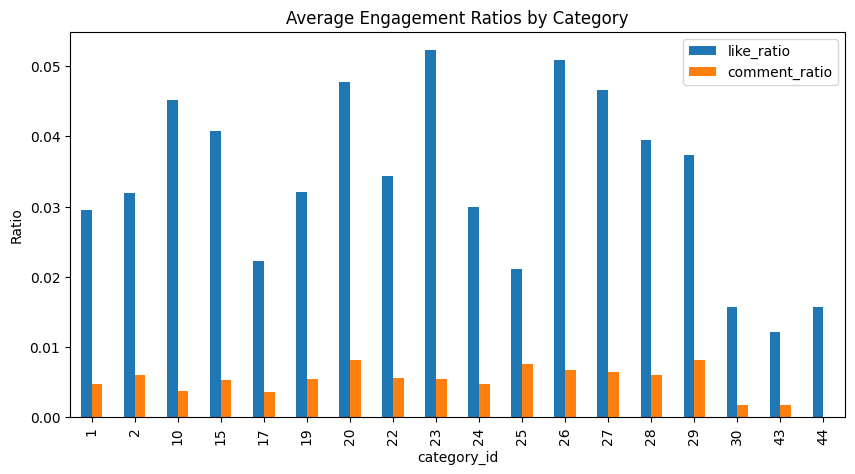

In [24]:
engagement_by_category = df.groupby("category_id")[["like_ratio", "comment_ratio"]].mean()

engagement_by_category.plot(kind="bar", figsize=(10,5))
plt.title("Average Engagement Ratios by Category")
plt.ylabel("Ratio")
plt.show()

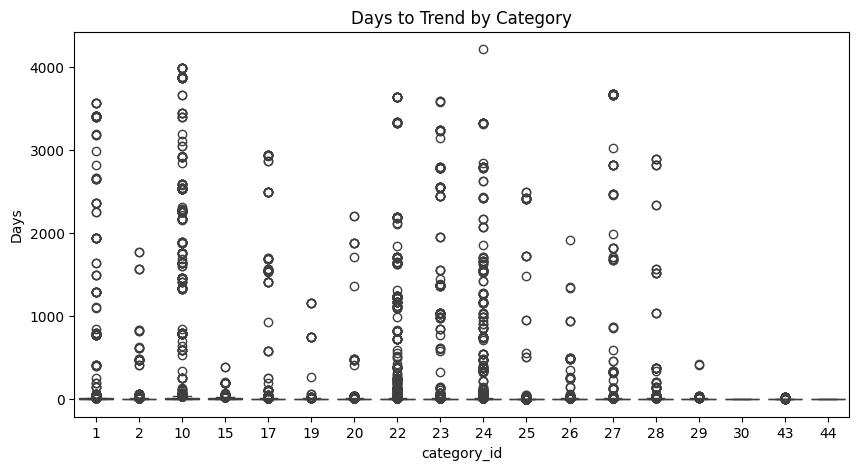

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="category_id", y="days_to_trend")
plt.title("Days to Trend by Category")
plt.ylabel("Days")
plt.show()


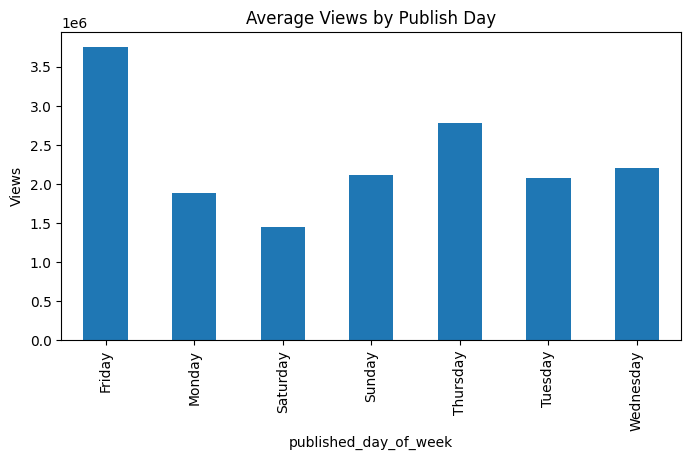

In [29]:
day_views = df.groupby("published_day_of_week")["views"].mean()

day_views.plot(kind="bar", figsize=(8,4))
plt.title("Average Views by Publish Day")
plt.ylabel("Views")
plt.show()


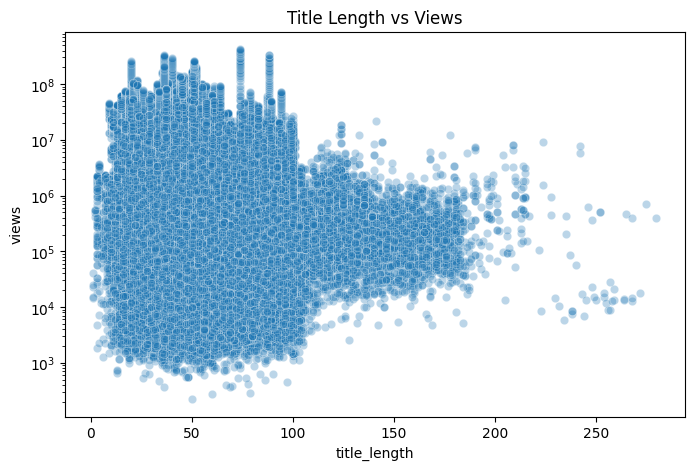

In [30]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="title_length", y="views", alpha=0.3)
plt.yscale("log")
plt.title("Title Length vs Views")
plt.show()


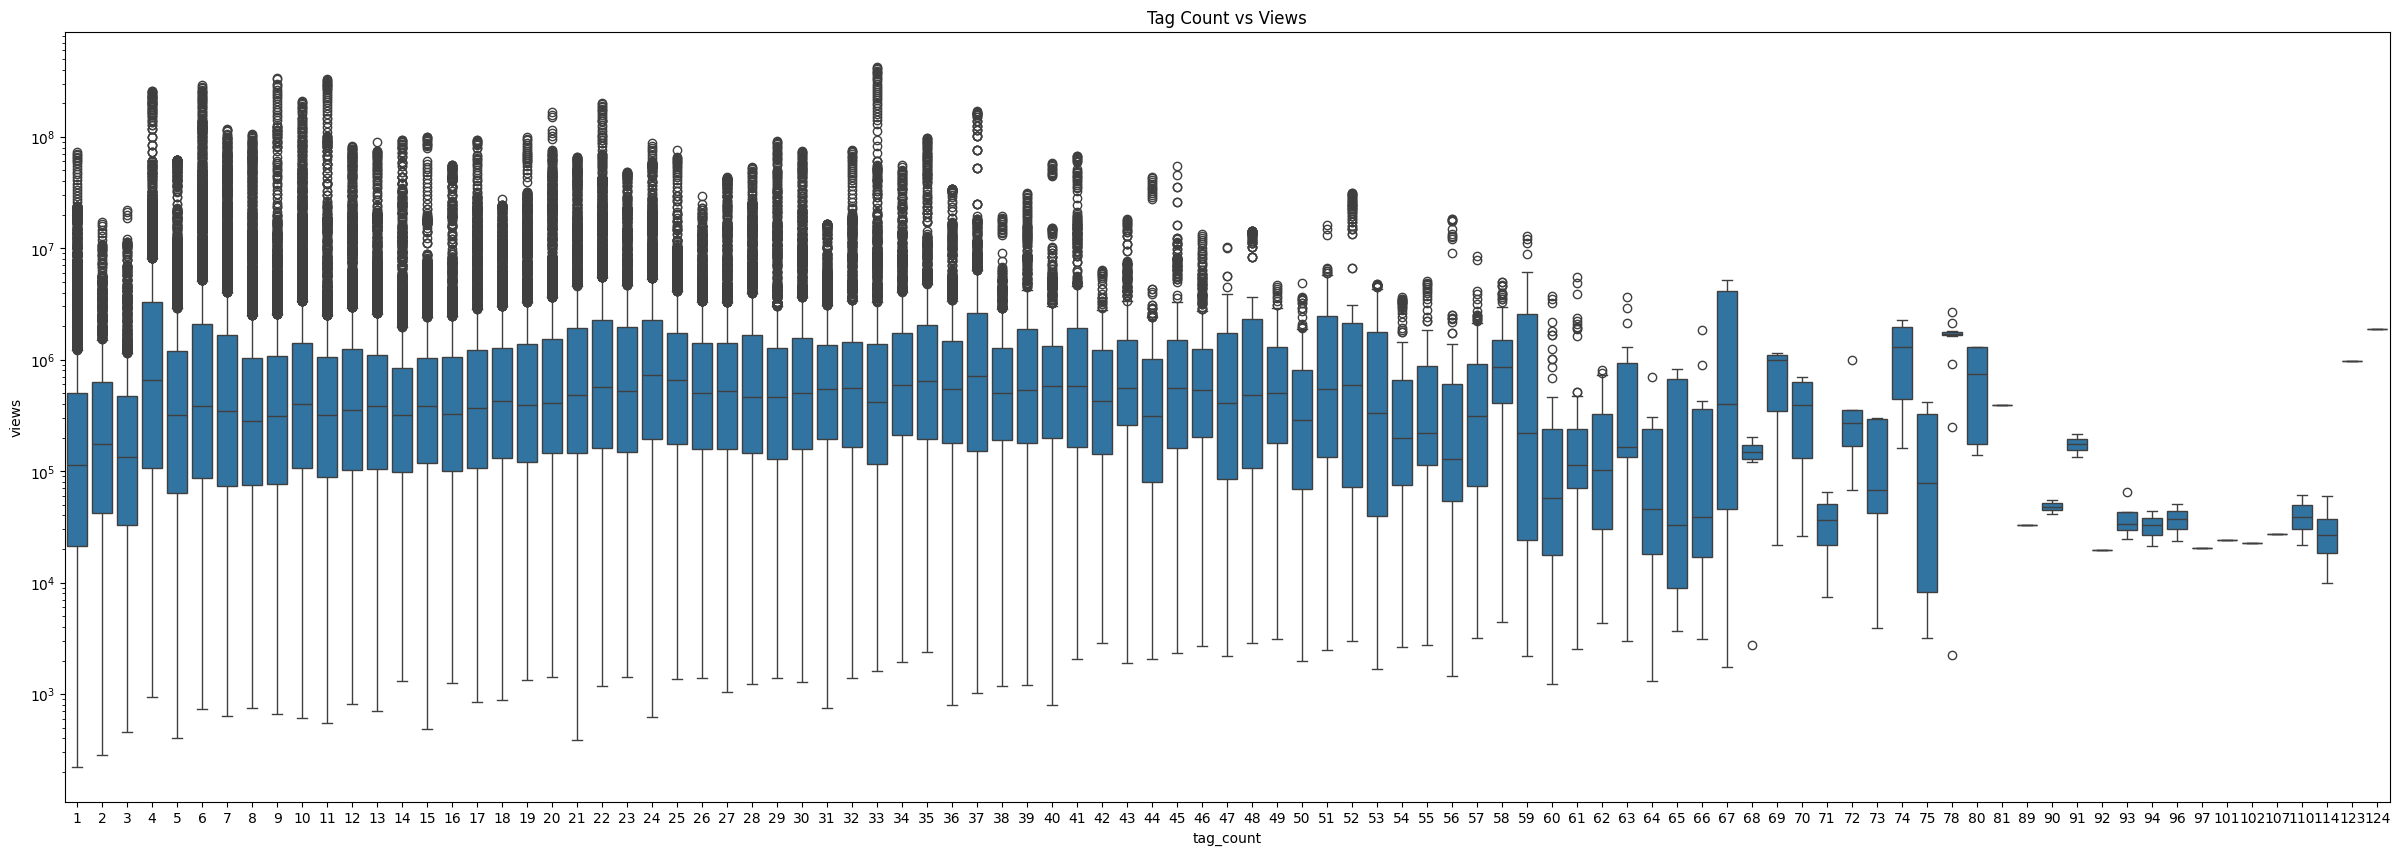

In [34]:
plt.figure(figsize=(30,10))
sns.boxplot(data=df, x="tag_count", y="views")
plt.yscale("log")
plt.title("Tag Count vs Views")
plt.show()


In [38]:
category_mapping = {
    1: "Film & Animation",
    2: "Autos & Vehicles",
    10: "Music",
    15: "Pets & Animals",
    17: "Sports",
    18: "Short Movies",
    19: "Travel & Events",
    20: "Gaming",
    21: "Videoblogging",
    22: "People & Blogs",
    23: "Comedy",
    24: "Entertainment",
    25: "News & Politics",
    26: "Howto & Style",
    27: "Education",
    28: "Science & Technology",
    29: "Nonprofits & Activism",
    30: "Movies",
    31: "Anime / Animation",
    32: "Action / Adventure",
    33: "Classics",
    34: "Comedy (Movies)",
    35: "Documentary",
    36: "Drama",
    37: "Family",
    38: "Foreign",
    39: "Horror",
    40: "Sci-Fi / Fantasy",
    41: "Thriller",
    42: "Shorts",
    43: "Shows",
    44: "Trailers"
}

df["category_name"] = df["category_id"].map(category_mapping)
df[["category_id", "category_name"]].drop_duplicates().sort_values("category_id")

,category_id,category_name
8,1,Film & Animation
30,2,Autos & Vehicles
12,10,Music
14,15,Pets & Animals
10,17,Sports
34,19,Travel & Events
131,20,Gaming
0,22,People & Blogs
2,23,Comedy
1,24,Entertainment


# The Data

## Dataset Overview
- **Total videos analyzed:** **161,470**
- **Date range:** **2006-07-23 → 2018-06-14**
- **Unique categories:** **18**

## Top Performing Categories

| Category | Avg Views | Avg Likes | Video Count |
|--------|----------:|----------:|------------:|
| **Music** | **8.22M** | **215K** | 27,903 |
| Film & Animation | 2.13M | 45.5K | 9,139 |
| Nonprofits & Activism | 2.08M | 166K | 335 |
| Entertainment | 1.60M | 42.0K | 42,358 |
| Science & Technology | 1.44M | 36.0K | 4,876 |

## Engagement Metrics
- **Average Like Ratio:** **3.64%**
- **Average Comment Ratio:** **0.52%**
- **Average Dislike Ratio:** **0.16%**

### Most Engaging Categories by Like Ratio
- **Comedy:** **5.23%**
- **How-to & Style:** **5.09%**
- **Gaming:** **4.77%**
- **Education:** **4.66%**
- **Music:** **4.51%**

## Trending Speed
- **Average days to trend:** **14.7 days**
- **Median days to trend:** **3 days**
- **Fastest possible:** **0 days**

### Fastest Trending Categories
- **Movies:** **2.0 days**
- **Shows:** **3.7 days**
- **Trailers:** **4.5 days**
- **News & Politics:** **6.4 days**
- **How-to & Style:** **6.6 days**

## Title & Tag Insights
- **Average title length:** **54 characters**
- **Average tags per video:** **18**
- **ALL CAPS titles:** **8.8% of videos**

### Correlation with Views
- **Title length vs views:** **-0.055**
- **Tag count vs views:** **-0.009**

## Views Distribution
- **Average views:** **2.42M**
- **Median views:** **384K**
- **Maximum views:** **424.5M**
- **Minimum views:** **223**

## Most Viewed Video
- **Title:** *Nicky Jam x J. Balvin – X (EQUIS)*
- **Category:** Music
- **Views:** **424.5M**
- **Likes:** **2.8M**
- **Days to trend:** **36**

## Key Takeaways
- **Music dominates reach**
- **Comedy leads engagement**
- **Movies & trailers trend fastest**
- **Metadata has minimal impact**
- **Views are highly skewed**


## Key Insights From the Analysis

### 1. Category Performance
- Entertainment, Music, and Comedy are the top three trending categories
- These categories have the highest no of videos and average views
- People and Blogs, News and Politics, How To and Sports videos come after these respectively

### 2. Engagement Patterns
- Videos with higher like ratios usually perform better and higher views
- Comment engagement varies by categories
- Videos with engagements such likes/dislike and comments disabled trend less frequently

### 3. Trending Timeline
- Videos typically trend within two weeks after publishing
- Some categories trend significantly faster than others
- Publishing timing may influence how quickly a video trends
- Early engagement seems very important for how trending

### 4. Content Optimization
- **Title Length**: Shorter sized titles perform better than long ones
- **All Caps Titles**: A noticeable portion of trending videos use all caps titles
- **Tags**: Most trending videos use less than 20 tags
- Excessive tagging does not consistently improve performance

### 5. View Distribution
- View counts are highly skewed
- A small fraction of videos achieve extremely high view counts
- Consistent content quality is more important than relying on viral outliers

### 6. Days of the Week
- Publishing day shows a measurable impact on average view counts
- Most no of videos trending were published before weekend on Thursday and Friday
- Planning to publish content before weekend can improve visibility


## Final Takeaways

1. **Categories**   
    You usually make videos on what you like to make videos on. But trying to mix the best of both worlds can help. For example, comedy is one such category which you can integrate to your otherwise unrelated video. It can be an educational, informational but combining it with another well performing category will help.

2. **Titles**  
   Keep titles clean, short, and informative. Avoid excessive use of All Caps.

3. **Tags**  
   Use the recommended number of about 20 highly relevant tags instead of using all the tags imaginable.

3. **Engagement and Momentum**  
   Strong engagement immediately after publishing increases the chances of the videos trending.

4. **Quality Over Quantity**  
   High performing videos consistently show strong engagement ratios.

5. **THUMBNAILS**  
   While this analysis focused on titles and metadata, thumbnails also play an very important role.


## Important Observations

- Views, likes, and comments show a strong positive correlation
- Content category influences trending potential
- Time to trend highlights the importance of early performance
- Engagement ratios are more informative than raw view counts alone


In [11]:
import os

# Create charts directory if it doesn't exist
if not os.path.exists('charts'):
    os.makedirs('charts')

# Set style for better-looking charts
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Generating charts for GitHub Pages...")

Generating charts for GitHub Pages...


In [ ]:
category_counts = df["category_id"].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="rocket")
plt.title("Number of Trending Videos per Category", fontsize=16, fontweight='bold')
plt.xlabel("Category ID", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('charts/category_distribution.png', dpi=300, bbox_inches='tight')
plt.close()
print("Chart 1: Category distribution saved")

/var/folders/n2/y90sy3vj5tn0kz3292nyp3kr0000gn/T/ipykernel_4610/3176828327.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="rocket")


✓ Chart 1: Category distribution saved


In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="views", y="likes", alpha=0.3, color='#FF0000')
plt.xscale("log")
plt.yscale("log")
plt.title("Views vs Likes (Log Scale)", fontsize=16, fontweight='bold')
plt.xlabel("Views (log scale)", fontsize=12)
plt.ylabel("Likes (log scale)", fontsize=12)
plt.tight_layout()
plt.savefig('charts/views_vs_likes.png', dpi=300, bbox_inches='tight')
plt.close()
print("Chart 2: Views vs Likes saved")

✓ Chart 2: Views vs Likes saved


In [ ]:
engagement_by_category = df.groupby("category_id")[["like_ratio", "comment_ratio"]].mean()

plt.figure(figsize=(12,6))
engagement_by_category.plot(kind="bar", ax=plt.gca(), color=['#FF0000', '#0066CC'])
plt.title("Average Engagement Ratios by Category", fontsize=16, fontweight='bold')
plt.xlabel("Category ID", fontsize=12)
plt.ylabel("Ratio", fontsize=12)
plt.legend(['Like Ratio', 'Comment Ratio'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('charts/engagement_by_category.png', dpi=300, bbox_inches='tight')
plt.close()
print("Chart 3: Engagement by category saved")

✓ Chart 3: Engagement by category saved


In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="category_id", y="days_to_trend", palette="Set2")
plt.title("Days to Trend by Category", fontsize=16, fontweight='bold')
plt.xlabel("Category ID", fontsize=12)
plt.ylabel("Days", fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Limit y-axis for better visibility
plt.tight_layout()
plt.savefig('charts/days_to_trend.png', dpi=300, bbox_inches='tight')
plt.close()
print("Chart 4: Days to trend saved")

/var/folders/n2/y90sy3vj5tn0kz3292nyp3kr0000gn/T/ipykernel_4610/1391150034.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="category_id", y="days_to_trend", palette="Set2")


✓ Chart 4: Days to trend saved


In [ ]:
df['published_day_of_week'] = df['publish_date'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_views = df.groupby("published_day_of_week")["views"].mean().reindex(day_order)

plt.figure(figsize=(10,6))
day_views.plot(kind="bar", color='#FF6B6B', ax=plt.gca())
plt.title("Average Views by Publish Day", fontsize=16, fontweight='bold')
plt.xlabel("Day of Week", fontsize=12)
plt.ylabel("Average Views", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('charts/views_by_day.png', dpi=300, bbox_inches='tight')
plt.close()
print("Chart 5: Views by publish day saved")

✓ Chart 5: Views by publish day saved


In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="title_length", y="views", alpha=0.3, color='#9B59B6')
plt.yscale("log")
plt.title("Title Length vs Views", fontsize=16, fontweight='bold')
plt.xlabel("Title Length (characters)", fontsize=12)
plt.ylabel("Views (log scale)", fontsize=12)
plt.tight_layout()
plt.savefig('charts/title_length_vs_views.png', dpi=300, bbox_inches='tight')
plt.close()
print("Chart 6: Title length vs views saved")

✓ Chart 6: Title length vs views saved


In [ ]:
df_tags = df[df['tag_count'] <= 50]

plt.figure(figsize=(14,6))
sns.boxplot(data=df_tags, x="tag_count", y="views", palette="coolwarm")
plt.yscale("log")
plt.title("Tag Count vs Views", fontsize=16, fontweight='bold')
plt.xlabel("Number of Tags", fontsize=12)
plt.ylabel("Views (log scale)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('charts/tag_count_vs_views.png', dpi=300, bbox_inches='tight')
plt.close()
print("Chart 7: Tag count vs views saved")

/var/folders/n2/y90sy3vj5tn0kz3292nyp3kr0000gn/T/ipykernel_4610/2304605400.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_tags, x="tag_count", y="views", palette="coolwarm")


✓ Chart 7: Tag count vs views saved

✅ All charts generated successfully in the 'charts' folder!
